In [1]:
#angular_momentum_flux.ipynb
#by Joe Hahn, jmh.datasciences@gmail.com, 17 June 2018.
#this...

In [2]:
#set input parameters
number_of_streamlines = 2
particles_per_streamline = 1001
radial_width = 1.0e-3
total_ring_mass = 1.5e-9
G_ring = 1.0
shear_viscosity = 6.0e-13
Q_ring = -1.0
Rp = 0.5
J2 = 0.01
e_init = 5.0e-3
import numpy as np
adedas = [0.0, 0.2, 0.5, 0.75, np.sqrt(3.0)/2, 1.0]
from helper_fns import *

In [3]:
#prep plots
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rcParams
sns.set(font_scale=1.5, font='DejaVu Sans')
import numpy as np

In [4]:
#differential angular velocity versus a*(de/da)
delta_omega_list = []
t0_list = []
Fv_list = []
Lv_list = []
for adeda in adedas:
    initial_orbits = {'shape':'eccentric', 'e':e_init, 'adeda':adeda}
    print initial_orbits
    #initialize streamlines
    r, t, vr, vt, lambda0, c = initialize_streamline(number_of_streamlines, 
        particles_per_streamline, radial_width, total_ring_mass, G_ring, Q_ring, 
        shear_viscosity, J2, Rp, initial_orbits)
    a, e, wt, M = coords2elem(J2, Rp, r, t, vr, vt)
    #recompute r,t in coordinate system that co-rotates with inner streamline's peri
    r, t, vr, vt, wt = peri_corotate(r, t, vr, vt, wt)
    #differential angular velocity vesus inner streamline's longitude
    omega = vt/r
    delta_omega_list += [omega[1] - omega[0]]
    t0_list += [t[0]]
    #angular momentum flux
    Ar, At = accelerations(lambda0, G_ring, shear_viscosity, c, r, t, vt)
    Fv = (lambda0*r*At)[-1]
    Fv_list += [Fv]
    #angular momentum luminosity
    delta_theta = 2.0*np.pi/particles_per_streamline    #approx arc-length
    delta_ell = r[1]*delta_theta
    Lv = (Fv*delta_ell).sum()
    Lv_list += [Lv]
delta_omega = np.array(delta_omega_list)
t0 = np.array(t0_list)
Fv = np.array(Fv_list)
Lv = np.array(Lv_list)

{'adeda': 0.0, 'shape': 'eccentric', 'e': 0.005}
this lambda-check should equal one =  1.0
{'adeda': 0.2, 'shape': 'eccentric', 'e': 0.005}
this lambda-check should equal one =  1.0
{'adeda': 0.5, 'shape': 'eccentric', 'e': 0.005}
this lambda-check should equal one =  1.0
{'adeda': 0.75, 'shape': 'eccentric', 'e': 0.005}
this lambda-check should equal one =  1.0
{'adeda': 0.8660254037844386, 'shape': 'eccentric', 'e': 0.005}
this lambda-check should equal one =  1.0
{'adeda': 1.0, 'shape': 'eccentric', 'e': 0.005}
this lambda-check should equal one =  1.0


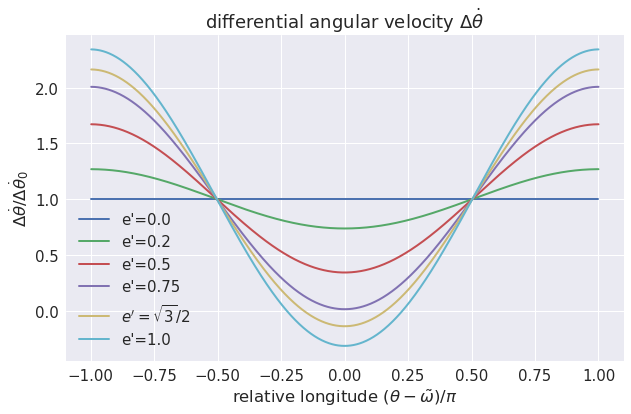

In [5]:
#differential angular velocity vs longitude
f, ax = plt.subplots(figsize=(10, 6))
for idx in range(len(adedas)):
    x = t0[idx]/np.pi
    y = delta_omega[idx]/delta_omega[0]
    lbl = "e'=" + str(adedas[idx])
    if (idx == 4):
        lbl = r"$e'=\sqrt{3}/2$"
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=lbl)
p = ax.set_title(r'differential angular velocity $\Delta\dot{\theta}$')
p = ax.set_xlabel(r'relative longitude $(\theta - \tilde{\omega})/\pi$')
p = ax.set_ylabel(r"$\Delta\dot{\theta}/\Delta\dot{\theta}_0$")
p = plt.legend()

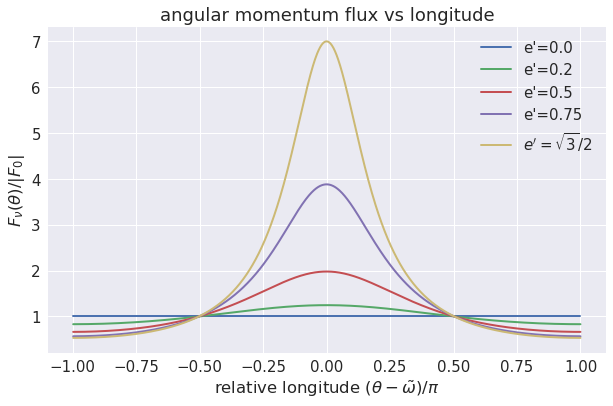

In [6]:
#angular momentum flux vs longitude
f, ax = plt.subplots(figsize=(10, 6))
for idx in range(len(adedas))[:-1]:
    x = t0[idx]/np.pi
    y = Fv[idx]/np.abs(Fv[0])
    lbl = "e'=" + str(adedas[idx])
    if (idx == 4):
        lbl = r"$e'=\sqrt{3}/2$"
    p = ax.plot(x, y, linestyle='-', linewidth=2, label=lbl)
p = ax.set_title('angular momentum flux vs longitude')
p = ax.set_xlabel(r'relative longitude $(\theta - \tilde{\omega})/\pi$')
p = ax.set_ylabel(r"$F_\nu(\theta)/|F_0|$")
p = plt.legend()

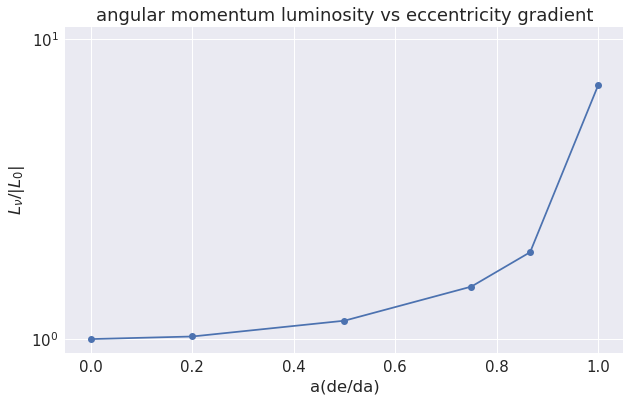

In [7]:
#plot angular momentum luminosity vs adeda
f, ax = plt.subplots(figsize=(10, 6))
x = adedas
y = Lv/Lv[0]
p = ax.plot(x, y, linestyle='-', marker='o')
p = ax.set_title('angular momentum luminosity vs eccentricity gradient')
p = ax.set_xlabel(r'a(de/da)')
p = ax.set_ylabel(r"$L_\nu/|L_0|$")
p = ax.set_yscale('log')
p = ax.set_ylim(0.9, 11)